In [1]:
import numpy as np
x_test = np.load('/home/jovyan/Wustl_iiot/x_test.npy')
x_train = np.load('/home/jovyan/Wustl_iiot/x_train.npy')
x_val = np.load('/home/jovyan/Wustl_iiot/x_val.npy')
y_test = np.load('/home/jovyan/Wustl_iiot/y_test.npy')
y_train = np.load('/home/jovyan/Wustl_iiot/y_train.npy')
y_val = np.load('/home/jovyan/Wustl_iiot/y_val.npy')

In [2]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
metrics = {
        "model" : '',
        "attack_model" : '',
        "epsilon" : '',
        "Accuracy": '',
        "Precision-micro": '',
        "Precision-macro": '',
        "Precision-weighted": '',
        "F1-micro": '',
        "F1-macro": '',
        "F1-weighted": '',
        "Recall_micro": '',
        "Recall_macro": '',
        "Recall_weighted": '',
        "FPR": '',
        "TPR": '',
        "FNR": '',
        "TNR": '',
        # "AUC": auc
    }
metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv("/home/jovyan/Wustl_iiot/transfer_attack/attackmodel.csv", mode='a', index=False)

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def printmatrix(x_test_adv, y_test, classifier, model_name, attack_name, epsilon):
    # preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    preds = classifier.predict(x_test_adv)

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    recall_macro = recall_score(y_test_arg, y_hat, average='macro')
    recall_micro = recall_score(y_test_arg, y_hat, average='micro')
    recall_weighted = recall_score(y_test_arg, y_hat, average='weighted')

    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"epsilon = {epsilon}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    print(f"Recall(micro,macro,weighted: {recall_micro},{recall_macro},{recall_weighted}")

    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : model_name,
        "attack_model" : attack_name,
        "epsilon" : epsilon,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "Recall_micro": recall_micro,
        "Recall_macro": recall_macro,
        "Recall_weighted": recall_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/Wustl_iiot/transfer_attack/attackmodel.csv", mode='a', index=False, header=False)

In [5]:
from joblib import dump, load
from sklearn.tree import DecisionTreeClassifier
import keras

best_dt = DecisionTreeClassifier(max_depth= 7, min_samples_leaf=1, min_samples_split=5)
best_dt.fit(x_train, y_train)

dump(best_dt, "/home/jovyan/Wustl_iiot/pre_train/DT.joblib")

model = best_dt

2024-04-16 21:56:46.848696: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 21:56:46.852128: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 21:56:46.913595: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 21:56:47.784983: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.01
FPR: [0.05751306 0.         0.         0.01546994 0.        ]
TPR: [0.14285714 0.         0.         0.         1.        ]
FNR: [0.85714286 1.         1.         1.         0.        ]
TNR: [0.94248694 1.         1.         0.98453006 1.        ]
Accuracy: 0.927133899888169
Precision(micro,macro,weighted): 0.927133899888169,0.20008736803785948,0.9271088461602073
F1(micro,macro,weighted: 0.927133899888169,0.200174203382449,0.9271089225379798
Recall(micro,macro,weighted: 0.927133899888169,0.22857142857142856,0.927133899888169
FPR: 0.014596599840645916
tpr: 0.22857142857142856
fnr: 0.7714285714285715
tnr: 0.985403400159354


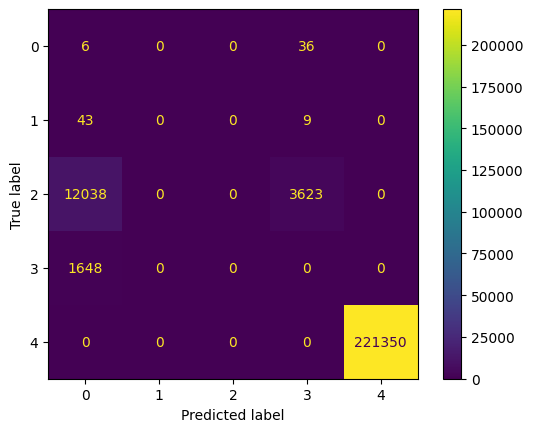

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.1
FPR: [0.05751306 0.         0.         0.01546994 0.        ]
TPR: [0.14285714 0.         0.         0.         1.        ]
FNR: [0.85714286 1.         1.         1.         0.        ]
TNR: [0.94248694 1.         1.         0.98453006 1.        ]
Accuracy: 0.927133899888169
Precision(micro,macro,weighted): 0.927133899888169,0.20008736803785948,0.9271088461602073
F1(micro,macro,weighted: 0.927133899888169,0.200174203382449,0.9271089225379798
Recall(micro,macro,weighted: 0.927133899888169,0.22857142857142856,0.927133899888169
FPR: 0.014596599840645916
tpr: 0.22857142857142856
fnr: 0.7714285714285715
tnr: 0.985403400159354


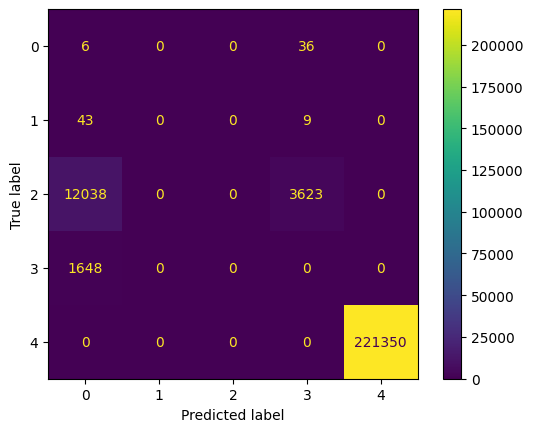

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.2
FPR: [0.05751306 0.         0.         0.01546994 0.        ]
TPR: [0.14285714 0.         0.         0.         1.        ]
FNR: [0.85714286 1.         1.         1.         0.        ]
TNR: [0.94248694 1.         1.         0.98453006 1.        ]
Accuracy: 0.927133899888169
Precision(micro,macro,weighted): 0.927133899888169,0.20008736803785948,0.9271088461602073
F1(micro,macro,weighted: 0.927133899888169,0.200174203382449,0.9271089225379798
Recall(micro,macro,weighted: 0.927133899888169,0.22857142857142856,0.927133899888169
FPR: 0.014596599840645916
tpr: 0.22857142857142856
fnr: 0.7714285714285715
tnr: 0.985403400159354


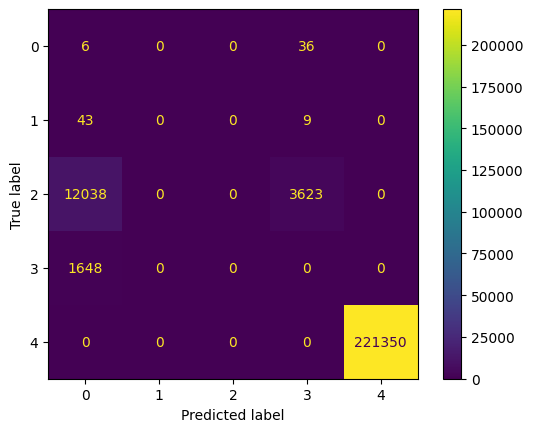

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.3
FPR: [0.05751306 0.         0.         0.01546994 0.        ]
TPR: [0.14285714 0.         0.         0.         1.        ]
FNR: [0.85714286 1.         1.         1.         0.        ]
TNR: [0.94248694 1.         1.         0.98453006 1.        ]
Accuracy: 0.927133899888169
Precision(micro,macro,weighted): 0.927133899888169,0.20008736803785948,0.9271088461602073
F1(micro,macro,weighted: 0.927133899888169,0.200174203382449,0.9271089225379798
Recall(micro,macro,weighted: 0.927133899888169,0.22857142857142856,0.927133899888169
FPR: 0.014596599840645916
tpr: 0.22857142857142856
fnr: 0.7714285714285715
tnr: 0.985403400159354


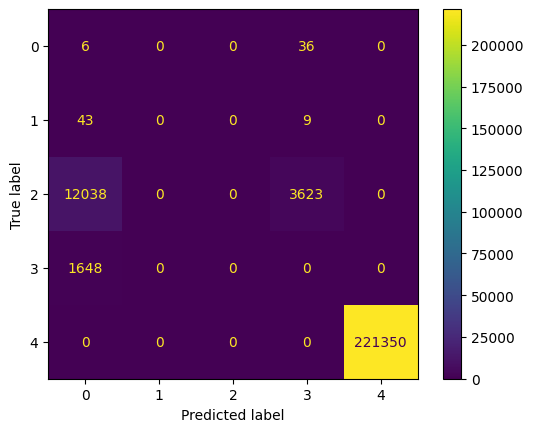

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.01
FPR: [0.05752563 0.         0.         0.01545729 0.        ]
TPR: [0.14285714 0.         0.         0.         1.        ]
FNR: [0.85714286 1.         1.         1.         0.        ]
TNR: [0.94247437 1.         1.         0.98454271 1.        ]
Accuracy: 0.927133899888169
Precision(micro,macro,weighted): 0.927133899888169,0.20008734895909158,0.927108846143426
F1(micro,macro,weighted: 0.927133899888169,0.20017416545718433,0.927108922504622
Recall(micro,macro,weighted: 0.927133899888169,0.22857142857142856,0.927133899888169
FPR: 0.014596582815782088
tpr: 0.22857142857142856
fnr: 0.7714285714285715
tnr: 0.985403417184218


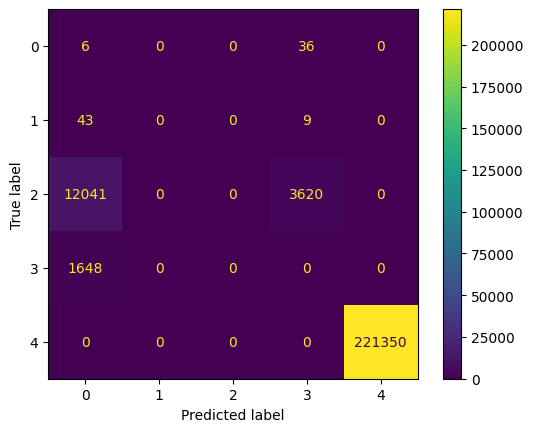

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.1
FPR: [0.05741671 0.         0.         0.0152675  0.        ]
TPR: [0.16666667 0.         0.0044697  0.         1.        ]
FNR: [0.83333333 1.         0.9955303  1.         0.        ]
TNR: [0.94258329 1.         1.         0.9847325  1.        ]
Accuracy: 0.9274312783504292
Precision(micro,macro,weighted): 0.9274312783504292,0.4001020929045431,0.9927038463998775
F1(micro,macro,weighted: 0.9274312783504292,0.20198348732984236,0.9276927191463374
Recall(micro,macro,weighted: 0.9274312783504292,0.23422727369474067,0.9274312783504292
FPR: 0.014536841285923686
tpr: 0.23422727369474067
fnr: 0.7657727263052594
tnr: 0.9854631587140762


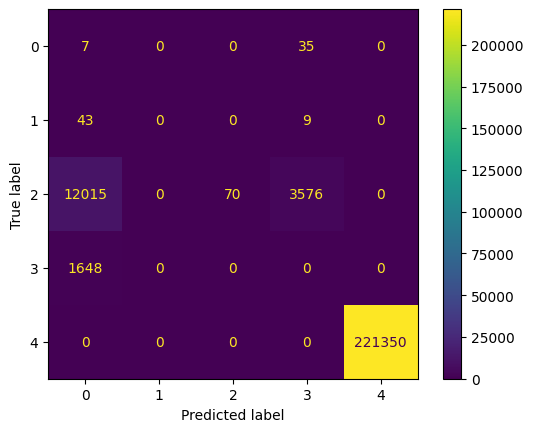

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.2
FPR: [5.84137304e-02 0.00000000e+00 4.48245567e-06 8.82731279e-03
 0.00000000e+00]
TPR: [0.16666667 0.         0.0864568  0.00242718 1.        ]
FNR: [0.83333333 1.         0.9135432  0.99757282 0.        ]
TNR: [0.94158627 1.         0.99999552 0.99117269 1.        ]
Accuracy: 0.9328259749615712
Precision(micro,macro,weighted): 0.9328259749615712,0.40033424713049326,0.9926686017707295
F1(micro,macro,weighted: 0.9328259749615712,0.2324562033138659,0.9375627609900986
Recall(micro,macro,weighted: 0.9328259749615712,0.25111013093147305,0.9328259749615712
FPR: 0.013449105131998196
tpr: 0.25111013093147305
fnr: 0.748889869068527
tnr: 0.9865508948680016


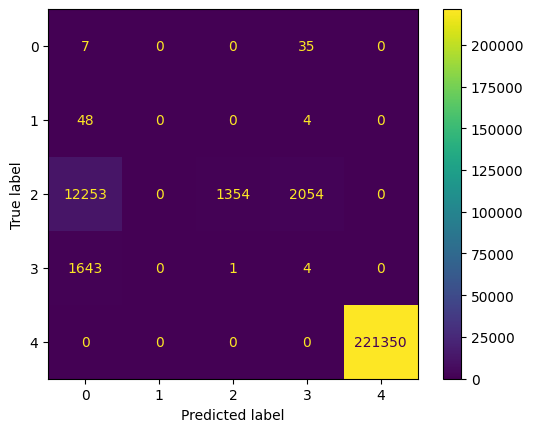

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.3
FPR: [6.29464080e-02 0.00000000e+00 1.79298227e-05 7.68014171e-03
 0.00000000e+00]
TPR: [0.14285714 0.         0.03435285 0.00485437 1.        ]
FNR: [0.85714286 1.         0.96564715 0.99514563 0.        ]
TNR: [0.93705359 1.         0.99998207 0.99231986 1.        ]
Accuracy: 0.92942078214724
Precision(micro,macro,weighted): 0.92942078214724,0.3994786099064285,0.9922499224679696
F1(micro,macro,weighted: 0.92942078214724,0.21436103924443078,0.9314966687047213
Recall(micro,macro,weighted: 0.92942078214724,0.23641287256408114,0.92942078214724
FPR: 0.014128895906334937
tpr: 0.23641287256408114
fnr: 0.7635871274359189
tnr: 0.9858711040936651


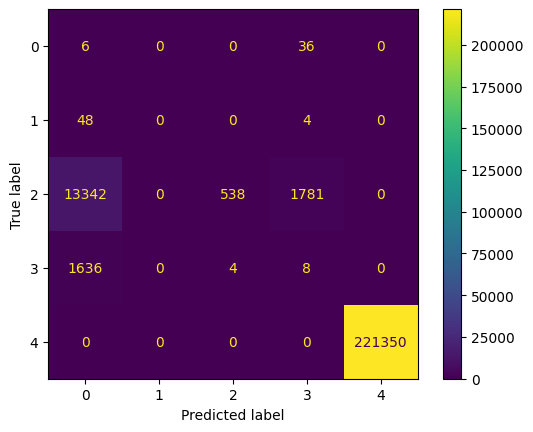

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.01
FPR: [0.05752563 0.         0.         0.01545729 0.        ]
TPR: [0.14285714 0.         0.         0.         1.        ]
FNR: [0.85714286 1.         1.         1.         0.        ]
TNR: [0.94247437 1.         1.         0.98454271 1.        ]
Accuracy: 0.927133899888169
Precision(micro,macro,weighted): 0.927133899888169,0.20008734895909158,0.927108846143426
F1(micro,macro,weighted: 0.927133899888169,0.20017416545718433,0.927108922504622
Recall(micro,macro,weighted: 0.927133899888169,0.22857142857142856,0.927133899888169
FPR: 0.014596582815782088
tpr: 0.22857142857142856
fnr: 0.7714285714285715
tnr: 0.985403417184218


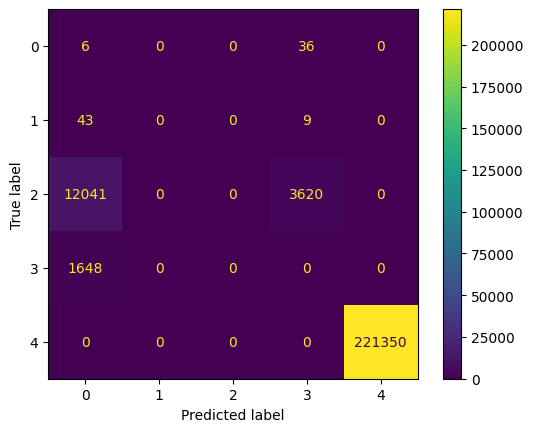

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.1
FPR: [0.05741252 0.         0.         0.01527172 0.        ]
TPR: [0.16666667 0.         0.0044697  0.         1.        ]
FNR: [0.83333333 1.         0.9955303  1.         0.        ]
TNR: [0.94258748 1.         1.         0.98472828 1.        ]
Accuracy: 0.9274312783504292
Precision(micro,macro,weighted): 0.9274312783504292,0.40010210035005833,0.9927038464064263
F1(micro,macro,weighted: 0.9274312783504292,0.20198350213007074,0.9276927191593553
Recall(micro,macro,weighted: 0.9274312783504292,0.23422727369474067,0.9274312783504292
FPR: 0.014536846960878294
tpr: 0.23422727369474067
fnr: 0.7657727263052594
tnr: 0.9854631530391217


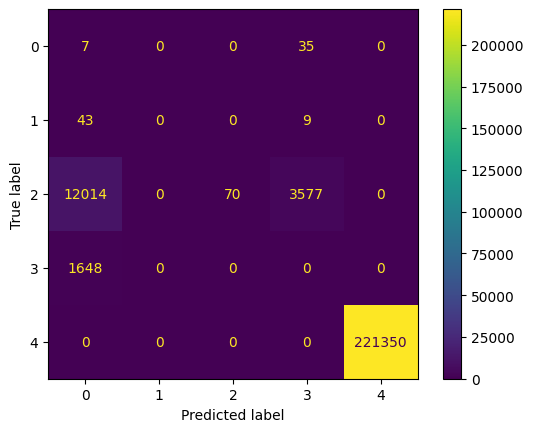

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.2
FPR: [5.83927846e-02 0.00000000e+00 4.48245567e-06 8.85261804e-03
 0.00000000e+00]
TPR: [0.16666667 0.         0.08639295 0.00242718 1.        ]
FNR: [0.83333333 1.         0.91360705 0.99757282 0.        ]
TNR: [0.94160722 1.         0.99999552 0.99114738 1.        ]
Accuracy: 0.9328217865325252
Precision(micro,macro,weighted): 0.9328217865325252,0.40033308565996695,0.9926685284844868
F1(micro,macro,weighted: 0.9328217865325252,0.23243395341052048,0.9375556407346766
Recall(micro,macro,weighted: 0.9328217865325252,0.2510973603548815,0.9328217865325252
FPR: 0.013449977014921635
tpr: 0.2510973603548815
fnr: 0.7489026396451186
tnr: 0.9865500229850784


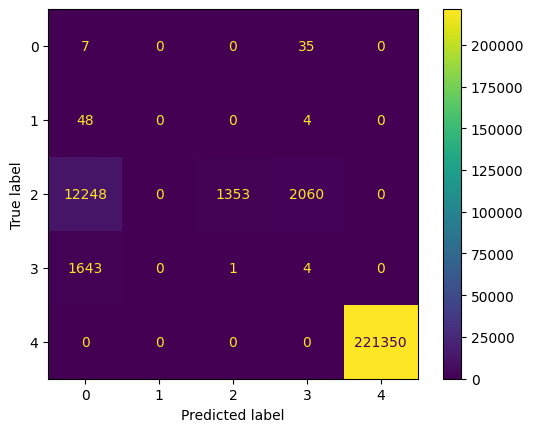

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.3
FPR: [6.26992472e-02 0.00000000e+00 1.79298227e-05 8.03441513e-03
 0.00000000e+00]
TPR: [0.14285714 0.         0.03275653 0.00485437 1.        ]
FNR: [0.85714286 1.         0.96724347 0.99514563 0.        ]
TNR: [0.93730075 1.         0.99998207 0.99196558 1.        ]
Accuracy: 0.9293160714210921
Precision(micro,macro,weighted): 0.9293160714210921,0.39936913812329616,0.9922251881432268
F1(micro,macro,weighted: 0.9293160714210921,0.21374235584665197,0.9312999223799852
Recall(micro,macro,weighted: 0.9293160714210921,0.2360936081492928,0.9293160714210921
FPR: 0.014150318432416773
tpr: 0.2360936081492928
fnr: 0.7639063918507072
tnr: 0.9858496815675831


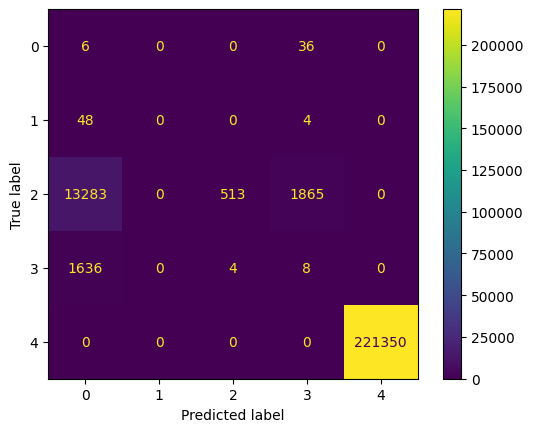

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 1e-07
FPR: [0.00876792 0.         0.         0.94898463 0.66913751]
TPR: [2.38095238e-02 0.00000000e+00 0.00000000e+00 1.21359223e-03
 1.35531963e-05]
FNR: [0.97619048 1.         1.         0.99878641 0.99998645]
TNR: [0.99123208 1.         1.         0.05101537 0.33086249]
Accuracy: 2.5130574275506487e-05
Precision(micro,macro,weighted): 2.5130574275506487e-05,0.0001487996636425682,0.0002389268095783439
F1(micro,macro,weighted: 2.5130574275506487e-05,0.00019594570754940735,2.4160777484670363e-05
Recall(micro,macro,weighted: 2.5130574275506487e-05,0.005007333847765795,2.5130574275506487e-05
FPR: 0.325378011297152
tpr: 0.005007333847765795
fnr: 0.9949926661522343
tnr: 0.674621988702848


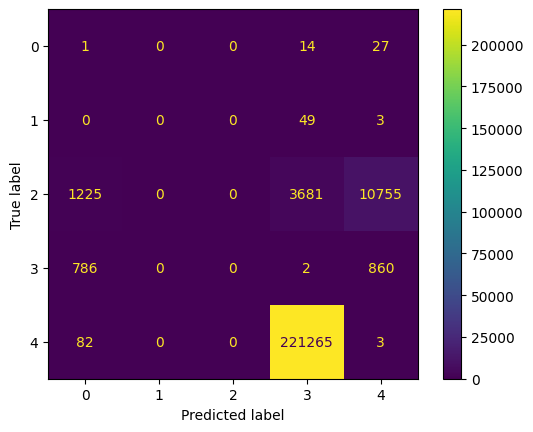

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 1e-06
FPR: [0.00876792 0.         0.         0.94898463 0.66913751]
TPR: [2.38095238e-02 0.00000000e+00 0.00000000e+00 1.21359223e-03
 1.35531963e-05]
FNR: [0.97619048 1.         1.         0.99878641 0.99998645]
TNR: [0.99123208 1.         1.         0.05101537 0.33086249]
Accuracy: 2.5130574275506487e-05
Precision(micro,macro,weighted): 2.5130574275506487e-05,0.0001487996636425682,0.0002389268095783439
F1(micro,macro,weighted: 2.5130574275506487e-05,0.00019594570754940735,2.4160777484670363e-05
Recall(micro,macro,weighted: 2.5130574275506487e-05,0.005007333847765795,2.5130574275506487e-05
FPR: 0.325378011297152
tpr: 0.005007333847765795
fnr: 0.9949926661522343
tnr: 0.674621988702848


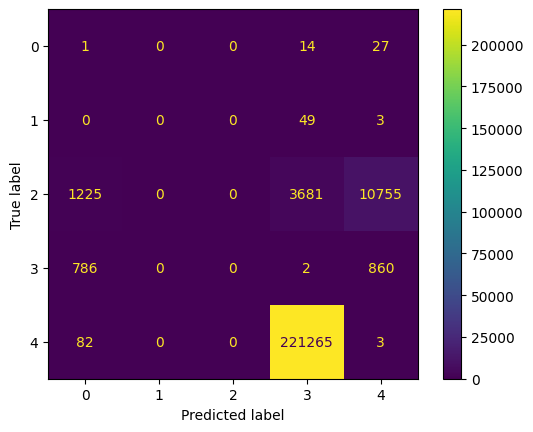

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 1e-05
FPR: [0.00876792 0.         0.         0.94898463 0.66913751]
TPR: [2.38095238e-02 0.00000000e+00 0.00000000e+00 1.21359223e-03
 1.35531963e-05]
FNR: [0.97619048 1.         1.         0.99878641 0.99998645]
TNR: [0.99123208 1.         1.         0.05101537 0.33086249]
Accuracy: 2.5130574275506487e-05
Precision(micro,macro,weighted): 2.5130574275506487e-05,0.0001487996636425682,0.0002389268095783439
F1(micro,macro,weighted: 2.5130574275506487e-05,0.00019594570754940735,2.4160777484670363e-05
Recall(micro,macro,weighted: 2.5130574275506487e-05,0.005007333847765795,2.5130574275506487e-05
FPR: 0.325378011297152
tpr: 0.005007333847765795
fnr: 0.9949926661522343
tnr: 0.674621988702848


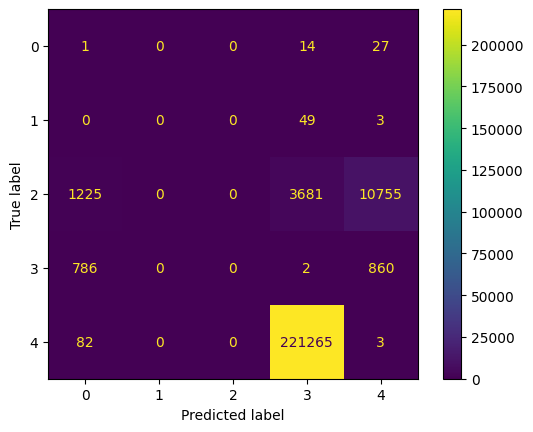

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.0001
FPR: [0.00876374 0.         0.         0.94898463 0.66919497]
TPR: [2.38095238e-02 0.00000000e+00 0.00000000e+00 1.21359223e-03
 1.35531963e-05]
FNR: [0.97619048 1.         1.         0.99878641 0.99998645]
TNR: [0.99123626 1.         1.         0.05101537 0.33080503]
Accuracy: 2.5130574275506487e-05
Precision(micro,macro,weighted): 2.5130574275506487e-05,0.0001488408752514978,0.000238906351695105
F1(micro,macro,weighted: 2.5130574275506487e-05,0.000196033397818782,2.4160752168817393e-05
Recall(micro,macro,weighted: 2.5130574275506487e-05,0.005007333847765795,2.5130574275506487e-05
FPR: 0.3253886657354037
tpr: 0.005007333847765795
fnr: 0.9949926661522343
tnr: 0.6746113342645964


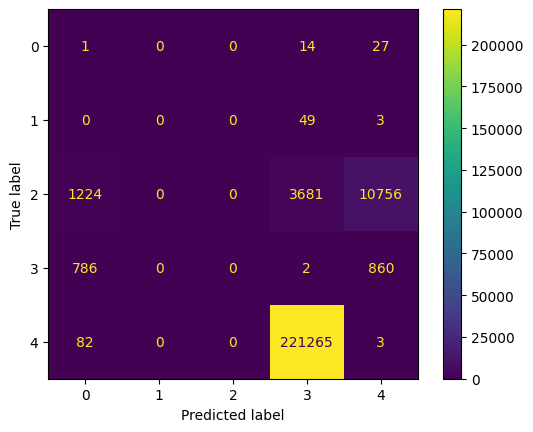

In [6]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Wustl_iiot/transfer_attack/x_test_adv_FGSM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "DT", "FGSM", epsilon)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Wustl_iiot/transfer_attack/x_test_adv_BIM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "DT", "BIM", epsilon)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Wustl_iiot/transfer_attack/x_test_adv_PGD_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "DT", "PGD", epsilon)

DF_eps = [1e-07, 1e-06, 1e-05, 1e-04]
for epsilon in DF_eps:
    filename = f'/home/jovyan/Wustl_iiot/transfer_attack/x_test_adv_DF_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "DT", "DF", epsilon)